In [41]:
# Titanic assessment

# Methodology or Rational behind the analysis
To create any model or to work on any model we can take this approach especially I feel that this approach would ideal to go about:
1. **Feature selection and engineering;** i.e choosing the correct columns according to our requirements.
2. **Cleaning and wranggling the data;** to make it usable in the format we want which would make our analysis more user friendly and for large datasets it will save a lot of time and computing costs
3. **Comparing the classifying algorithms;** we all know that none of the algorith is perfect or can provide with all the answers as per our requirement , hence we need to understand and compare the available classifiers to choose the one best suited for our work.
4. **The prediction;** lastly we need to give the test data to the computer to find out the predicted value and comparing the different classifiers


# 1. Importing packages


In [176]:
#libraries for data viewing and warragling
import pandas as pd
import numpy as np
import random as rnd

# from this kaggle task: 
# https://www.kaggle.com/competitions/titanic/overview

#Libraries for machine learning and comparing different classifiers.
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier

#libraries for performance metrics

from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score


#libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt



### **Loading and Viewing the Dataframes (Test and Train data)**

In [43]:
#loading the test dataframe 
test_df = pd.read_csv('test.csv')

#loading the train dataframe
train_df = pd.read_csv('train.csv')

#loading the remaing dataframe
gender_df = pd.read_csv('gender_submission.csv')

In [44]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Basic analysis by describing the data:

In [46]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

From the above output we can divide our dataset into categorical and numerical as well as mixed:
1. Catergorical data takes more processing power as these needs to be imputed
- Examples include: Survived, Sex, and Embarked. Ordinal: Pclass.
2. Numerical are easy to deal with as these are processed at a much faster rate
- Examples include: Age, Fare. Discrete: SibSp, Parch 
3. Mixed type, having both numerical and categorical data in a single cell
- Examples include: Tickets and Cabin having alphanumeric data

train_df.info()
print('*'*50)
test_df.info()

In [47]:
train_df.info()
print('*'*50)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0  

In [48]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


What are the main conclusions from the table above:
1. Only numerical columns have been shown in the above table
2. Total no. of samples are equal to 891 from count 
3. Survived is a binary column with either 0 or 1 from the max and min value 
4. In Pclass we can see that there are 3 classes from the quartile ranges
5. We can observe a small standard deviation in the age and 75% of all the passsengers were <40 years.
6. The has the highest variation across the column with very small percentage paid highest amount i.e. $512

In [49]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


What are the main conclusions from the table above:
1. The table comprises of only categorical values 
2. Name has 891 unique values 
3. There were almost equal gender distribution (64.7% are men)
4. Tickets have high non-unique values (23.5%) and a mixed of alphanumeric values as seen above
5. Cabin has repeating numbers (which is obvious) and also certain cabins were shared by more than one person.
6. Embarked column has 3 unique values with S being the most repeated one. 

******************************************************************************

### 2. Assessing data quality and Missing Values 

In [50]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [51]:
train_df['Age'].median()
print('Percent of missing age records is %.2f%%'%((train_df['Age'].isnull().sum()/train_df.shape[0]*100)))
print('The median of the age records is:', train_df['Age'].median())
train_df['Cabin'].mode()
print('Percent of missing cabin records is %.2f%%'%((train_df['Cabin'].isnull().sum()/train_df.shape[0]*100)))
train_df['Embarked'].mode()
print('Percent of missing embarked records is %.2f%%'%((train_df['Embarked'].isnull().sum()/train_df.shape[0]*100)))
print('The most common vale for embarked data is:', train_df['Embarked'].mode())


Percent of missing age records is 19.87%
The median of the age records is: 28.0
Percent of missing cabin records is 77.10%
Percent of missing embarked records is 0.22%
The most common vale for embarked data is: 0    S
Name: Embarked, dtype: object


***Data Cleaning***
- Some features needs to modified and cleaned so that we have a better model.
- We need to fill up the Age column as it have a lot of null values 
- Ticket feature can be droppped due to high volume of non-unique values.
- Cabin feature needs to be dropped as it more than 60% of null values.
- PassengerID is of no relevance in the model hence needs to be dropped.
- Even Name feature has no significant relevance hence needs to be dropped.
 

**Correlation among features and new feature creation from existing features**

1. Pclass: likely to have correlation with survival 
2. Sex: likely to have correlation with survival
3. SibSp and Parch: not likely to have correlation but can be used to new feature generation

In [52]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [53]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [54]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [55]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## Exploratory Data Analysis 

1. This would help us to understand the dataset from a visual point of view
2. Humans are more attracted to visual representation as compared to numerical representation
3. We would take numerical data and plot into different graphs to make it more comprendable 

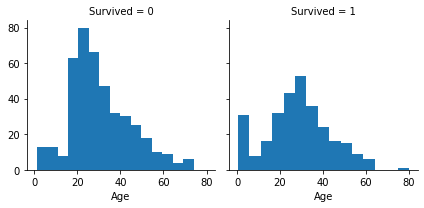

In [56]:
#Histogram in the form of facet grid:
# 
graph1 = sns.FacetGrid(train_df, col='Survived')
graph1.map(plt.hist, 'Age', bins=15)

The graphs shows that we need to group ages into ranges for better understanding.
- 20-35 had the highest number of deaths as well as survivals hence it's a good metric for our model creation
- Age bracketing would be useful for distinctive analysis.

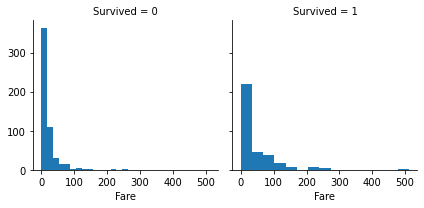

In [57]:
graph2 = sns.FacetGrid(train_df, col='Survived')
graph2.map(plt.hist, 'Fare', bins=15)

From the graphs above we can have some major conclusions
1. There is a strong positive correlation between Age and rate of survival. 
2. While from these it's difficult to come to any strong conclusion of fare we might need to check the Pclass correlation with survival.

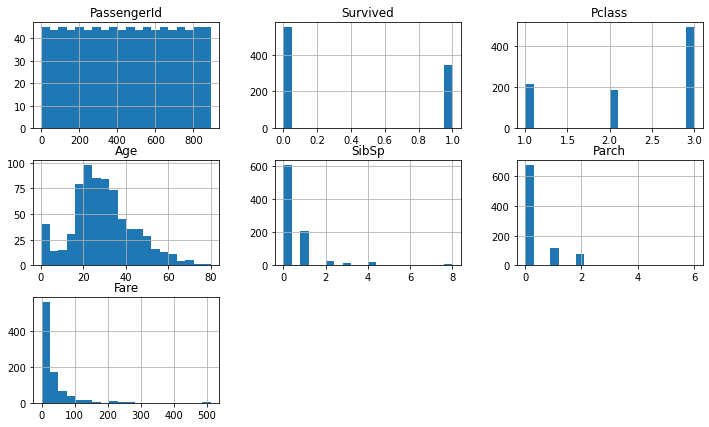

In [58]:
train_df.hist(bins=20,figsize=(12,7),grid=True);

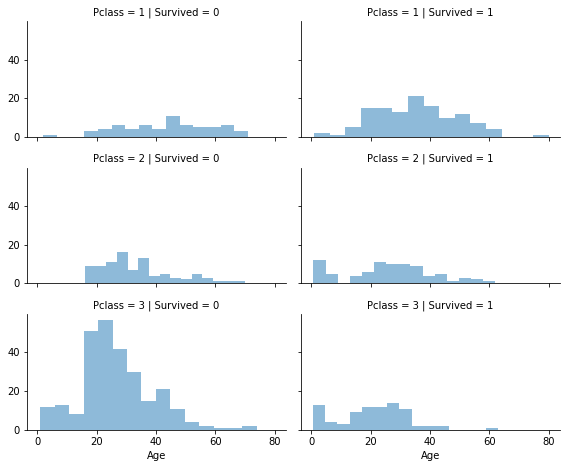

In [59]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.8)
grid.map(plt.hist, 'Age', alpha=0.5, bins=15)
grid.add_legend();

- From the graphs above we can clearly observe the storng positive correlation between passenger class and rate of survival.
- This would help us to incluse this feature into our model for better and accurate prediciton.

c:\Users\sense\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\sense\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


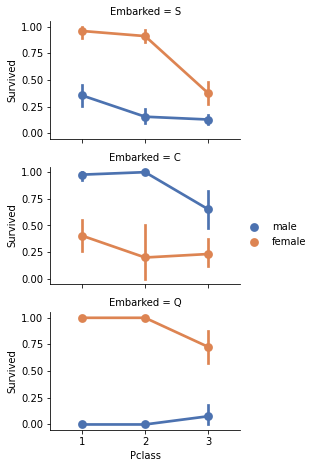

In [60]:
grid = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep');
grid.add_legend()

- Embarked has a direct correlation with the gender of the passengers which is evident from the graphs above
- Hence including gender by imputing would be good choice for the model creation
- Which in turn is related to the rate of survival as shown in the graphs below.

c:\Users\sense\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


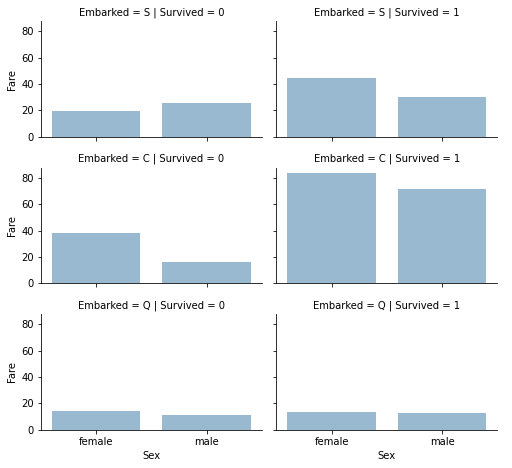

In [61]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

## **Data Wranggling**

In [ ]:
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
full_data=pd.concat([test_df,train_df,gender_df]) 

In [65]:
# .shape helps us to find the dimension of the data 
train_df.shape, test_df.shape

((891, 10), (418, 9))

In [66]:
full_data.shape

(1727, 10)

In [ ]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

In [95]:
full_data=pd.concat([train_df, test_df], axis=1)

In [68]:
train_df.shape, test_df.shape

((891, 8), (418, 8))

In [96]:
full_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S,892.0,3.0,male,34.5,0.0,0.0,7.8292,Q
1,1,1,female,38.0,1,0,71.2833,C,893.0,3.0,female,47.0,1.0,0.0,7.0000,S
2,1,3,female,26.0,0,0,7.9250,S,894.0,2.0,male,62.0,0.0,0.0,9.6875,Q
3,1,1,female,35.0,1,0,53.1000,S,895.0,3.0,male,27.0,0.0,0.0,8.6625,S
4,0,3,male,35.0,0,0,8.0500,S,896.0,3.0,female,22.0,1.0,1.0,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
887,1,1,female,19.0,0,0,30.0000,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
888,0,3,female,NaN,1,2,23.4500,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
889,1,1,male,26.0,0,0,30.0000,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
test_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,8.0500,S
414,1306,1,female,39.0,0,0,108.9000,C
415,1307,3,male,38.5,0,0,7.2500,S
416,1308,3,male,NaN,0,0,8.0500,S


## Data Imputation

In [101]:
train_df['Sex'] = train_df['Sex'].replace(["male"],'1') 
train_df['Sex'] = train_df['Sex'].replace(["female"],'0') 

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [102]:
test_df['Sex'] = test_df['Sex'].replace(["male"],'1') 
test_df['Sex'] = test_df['Sex'].replace(["female"],'0') 



,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,Q
1,893,3,0,47.0,1,0,7.0000,S
2,894,2,1,62.0,0,0,9.6875,Q
3,895,3,1,27.0,0,0,8.6625,S
4,896,3,0,22.0,1,1,12.2875,S


In [104]:
test_df.tail()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
413,1305,3,1,NaN,0,0,8.0500,S
414,1306,1,0,39.0,0,0,108.9000,C
415,1307,3,1,38.5,0,0,7.2500,S
416,1308,3,1,NaN,0,0,8.0500,S
417,1309,3,1,NaN,1,1,22.3583,C


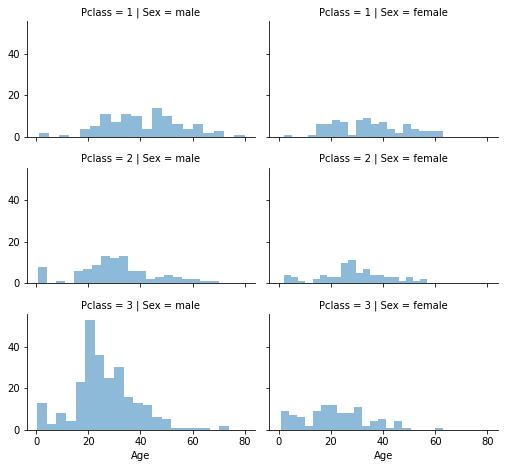

In [86]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

- The graphs above supports the statments which has been said in the previous sections of this notebook
- Hence we can clearly see the features which should be included in the model and which have direct correleation with the survival rate.


**Imputer function would use the nearest neighbour algorithm to fill in the best possible values and replace the NaN**

In [123]:
from sklearn.impute import SimpleImputer

#create the simple imputer
imputer = SimpleImputer(missing_values=np.nan)
to_impute = pd.DataFrame(train_df['Age'])
#fit the imputer to our data.
#Any data we impute on in the train stage we need to perform identically to our test.
data = pd.DataFrame(imputer.fit_transform(to_impute))



In [127]:
train_df['Age']= data

In [129]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [122]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [125]:
from sklearn.impute import SimpleImputer

#create the simple imputer
imputer = SimpleImputer(missing_values=np.nan)
to_impute2 = pd.DataFrame(test_df['Age'])
#fit the imputer to our data.
#Any data we impute on in the train stage we need to perform identically to our test.
data2 = pd.DataFrame(imputer.fit_transform(to_impute2))

In [147]:
from sklearn.impute import SimpleImputer

#create the simple imputer
imputer = SimpleImputer(missing_values=np.nan)
to_impute2 = pd.DataFrame(test_df['Fare'])
#fit the imputer to our data.
#Any data we impute on in the train stage we need to perform identically to our test.
data3 = pd.DataFrame(imputer.fit_transform(to_impute2))

In [130]:
test_df['Age']= data2

In [148]:
test_df['Fare']= data3

In [150]:
test_df2=test_df.drop(['PassengerId','SibSp','Parch','Embarked'],axis=1)

In [153]:
test_df2

,Pclass,Sex,Age,Fare
0,3,1,34.50000,7.8292
1,3,0,47.00000,7.0000
2,2,1,62.00000,9.6875
3,3,1,27.00000,8.6625
4,3,0,22.00000,12.2875
...,...,...,...,...
413,3,1,30.27259,8.0500
414,1,0,39.00000,108.9000
415,3,1,38.50000,7.2500
416,3,1,30.27259,8.0500


In [138]:
train_df2=train_df.drop(['SibSp','Parch','Embarked'],axis=1)

In [139]:
train_df2

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.000000,7.2500
1,1,1,0,38.000000,71.2833
2,1,3,0,26.000000,7.9250
3,1,1,0,35.000000,53.1000
4,0,3,1,35.000000,8.0500
...,...,...,...,...,...
886,0,2,1,27.000000,13.0000
887,1,1,0,19.000000,30.0000
888,0,3,0,29.699118,23.4500
889,1,1,1,26.000000,30.0000


## Model building and efficiency testing

In [172]:
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [154]:
X_train = train_df2.drop("Survived", axis=1)
Y_train = train_df2["Survived"]
X_test  = test_df2.copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 4), (891,), (418, 4))

### Logistic regression

In [155]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.02

### Support Vector Machines

In [156]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

68.24

### Linear SVC

In [187]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2);
acc_linear_svc

c:\Users\sense\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


76.32

### Random Forest

In [171]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

97.98

### Decision Tree

In [170]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

97.98

### K-Nearest Neighbour

In [173]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.18

### Scoring matrix

In [188]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest','Linear SVC', 
              'Decision Tree'],
    'Score': [acc_knn, acc_log, 
              acc_random_forest, 
              acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,97.98
4,Decision Tree,97.98
0,KNN,84.18
1,Logistic Regression,80.02
3,Linear SVC,76.32


In [189]:
models=models.sort_values(by='Score', ascending=False)

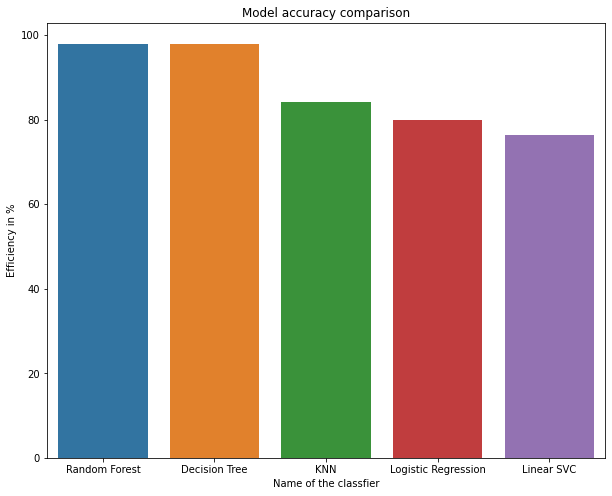

In [192]:
plt.figure(figsize=(10, 8))
sns.barplot(x="Model", y="Score", data=models);
plt.title("Model accuracy comparison");
plt.xlabel("Name of the classfier");
plt.ylabel("Efficiency in %");